In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from RaTag.scripts.wfm2read_fast import wfm2read


In [3]:
test_data = '/Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/26052025_SCA_4.62-5.82.wfm'
y, t, info, ind_over, ind_under = wfm2read(test_data)

Reading 10000 data points from /Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/26052025_SCA_4.62-5.82.wfm starting at index 0 with step 1


(np.float64(5.5599998855590815), np.float64(-0.08000011444091815))

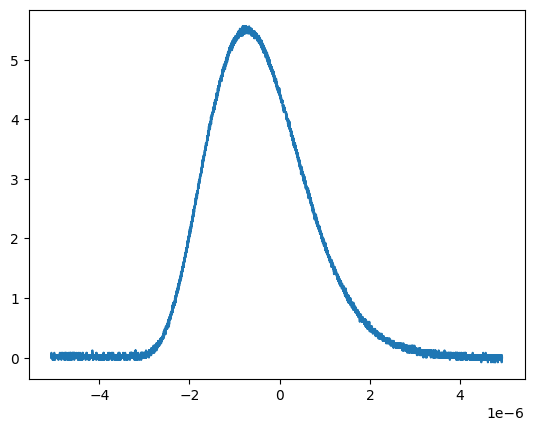

In [4]:
plt.plot(t, y)
np.max(y), np.min(y)

In [5]:
def get_all_peaks(path):
    """Function to read waveforms and plot histogram of peaks."""
    
    files = glob(path + '/*.wfm')

    peaks = []
    for f in files:
        y, t, peak, info, ind_over, ind_under = wfm2read(f)
        peaks.append(peak)
    peaks = np.array(peaks)
    return peaks

Reading 9999999 data points from /Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/26052025_SCA_4.62-5.82.wfm starting at index 0 with step 0.001


[(0.0, 1e-08)]

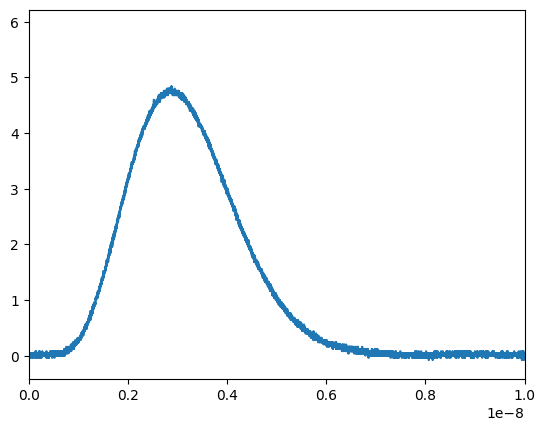

In [7]:
test_data = '/Users/pabloherrero/sabat/RaTagging/RaTag/scope_data/waveforms/26052025_SCA_4.62-5.82.wfm'
y, t, info, ind_over, ind_under = wfm2read(test_data, step=0.001)
plt.plot(t, y)
plt.gca().set(xlim=(0, 1e-8), )

In [8]:
from scipy.signal import find_peaks

peaks, props = find_peaks(y, height=1, distance=1, prominence=1)


[(1.6e-06, 1.8e-06)]

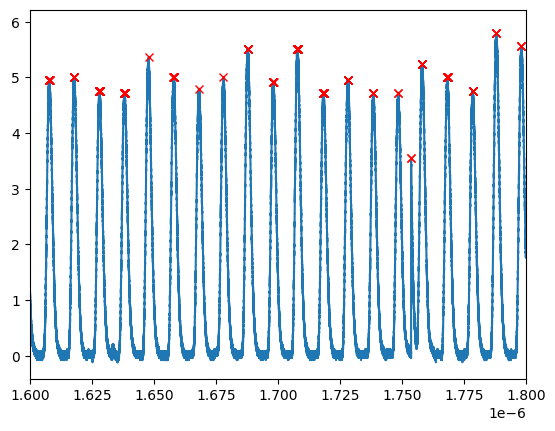

In [9]:
plt.plot(t, y)
plt.plot(t[peaks], y[peaks], 'x', color='red', label='Peaks')
plt.gca().set(xlim=(1.6e-6, 1.8e-6), )


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.210e+02,
        0.000e+00, 1.849e+03, 1.503e+03, 0.000e+00, 1.710e+02, 0.000e+00,
        3.300e+01, 5.500e+01, 0.000e+00, 2.630e+02, 0.000e+00, 9.410e+02,
        0.000e+00, 1.776e+03, 5.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 1.100e+01, 0.000e+00, 2.600e+01, 0.000e+00, 4.100e+01,
        3.000e+01, 0.000e+00, 1.580e+02, 0.000e+00, 5.720e+02, 9.100e+01,
        0.000e+00, 2.020e+02, 0.000e+0

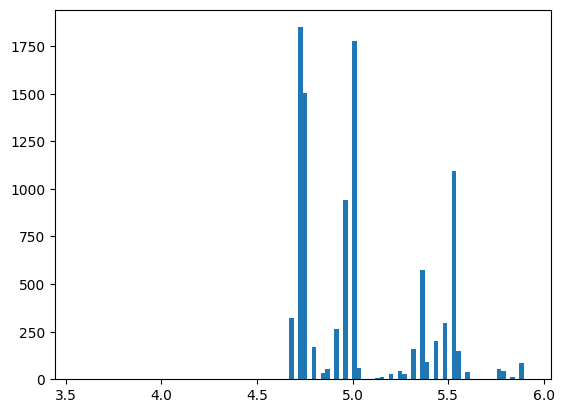

In [10]:
voltages = y[peaks]
plt.hist(voltages, bins=100)